In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics 
from scipy.stats import norm 
from scipy.stats import chi2
from scipy.stats import cauchy

# Esercitazione 2

## Esercizio 2.1

Funzione integranda è $f(x)=\frac{\pi}{2}\cos(\frac{\pi x}{2})$, la densità di probabilità per l'importance sampling è $d(x)=\left(\frac{\pi}{3}-x^2\right)\frac{1}{\frac{\pi}{3}-\frac{1}{3}}$. Per sampling uniforme calcoli $\mathrm{\left<I\right>}=\frac{1}{N}\sum^N_{i=1}f(x_i)$ con $x_i\in[0, 1]$ generata randomicamente uniformemente, per importance sampling calcoli $\mathrm{\left<I\right>}=\frac{1}{N}\sum^N_{i=1}\frac{f(x_i)}{d(x_i)}$ dove $x_i$ è generata randomicamente usando $d(x)$ (tramite accept and reject). Poi si plotta media e errore a blocchi.

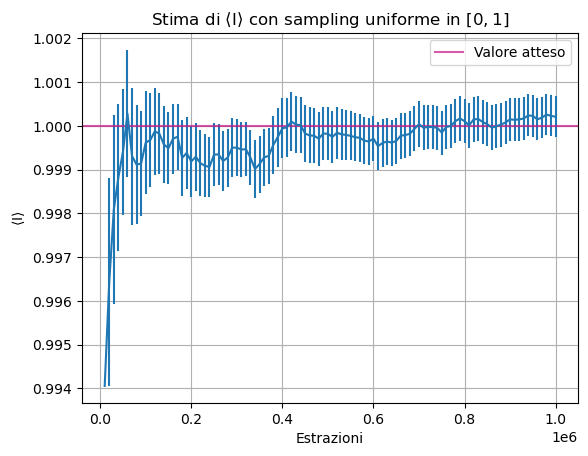

In [20]:
Min=1000000  #numero totale di estrazioni del generatore
Nin=100  #numero di blocchi
Lin=int(Min/Nin)  #numero di estrazioni per blocco
inx=np.arange(Nin)+1  #vettore delle ascisse dei punti plottati
inx*=Lin  #in questo modo sulle ascisse metto il numero di estrazioni totali a cui corrisponde l'ultima estrazione del blocco plottato

usy, userrorbars=np.loadtxt("unifintegral.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  #vettore delle ordinate dei punti plottati

plt.errorbar(inx, usy, yerr=userrorbars)
plt.axhline(y=1, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Estrazioni")
plt.ylabel(r"$\left<\mathrm{I}\right>$")
plt.title(r"Stima di $\left<\mathrm{I}\right>$ con sampling uniforme in $[0, 1]$")
plt.grid(True)
plt.legend()
plt.show()

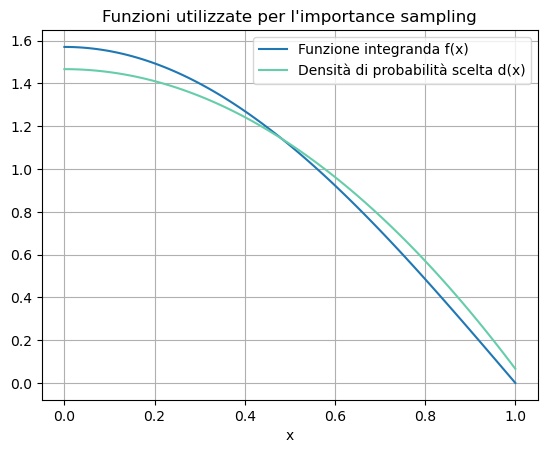

In [27]:
ax=np.linspace(0, 1, 100)
dx=((np.pi/3)-(ax*ax))*1/((np.pi/3)-(1/3))
fx=(np.pi/2)*np.cos((ax*np.pi)/2)

plt.plot(ax, fx, label="Funzione integranda f(x)")
plt.plot(ax, dx, label="Densità di probabilità scelta d(x)", color="mediumaquamarine")
plt.title("Funzioni utilizzate per l'importance sampling")
plt.xlabel("x")
plt.grid(True)
plt.legend()
plt.show()

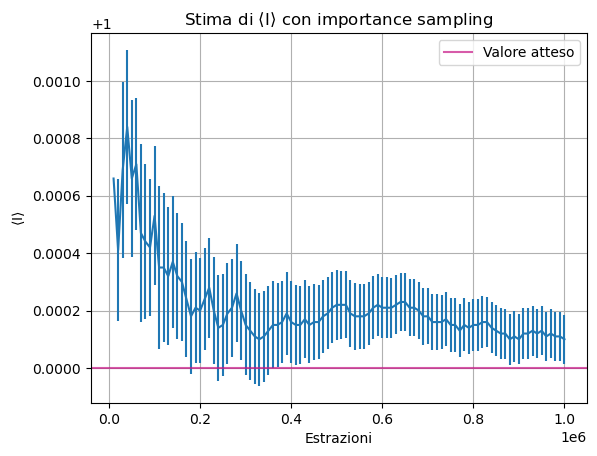

In [28]:
isy, iserrorbars=np.loadtxt("importintegral.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  #vettore delle ordinate dei punti plottati

plt.errorbar(inx, isy, yerr=iserrorbars)
plt.axhline(y=1, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Estrazioni")
plt.ylabel(r"$\left<\mathrm{I}\right>$")
plt.title(r"Stima di $\left<\mathrm{I}\right>$ con importance sampling")
plt.grid(True)
plt.legend()

plt.show()

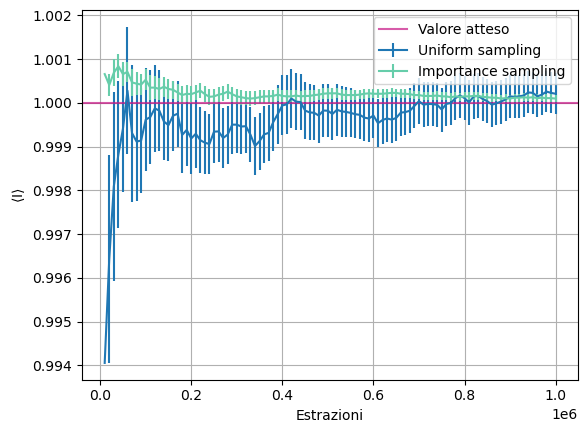

In [29]:
plt.errorbar(inx, usy, yerr=userrorbars, label="Uniform sampling")
plt.errorbar(inx, isy, yerr=iserrorbars, label="Importance sampling", color="mediumaquamarine")
plt.axhline(y=1, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Estrazioni")
plt.ylabel(r"$\left<\mathrm{I}\right>$")
plt.grid(True)
plt.legend()

plt.show()

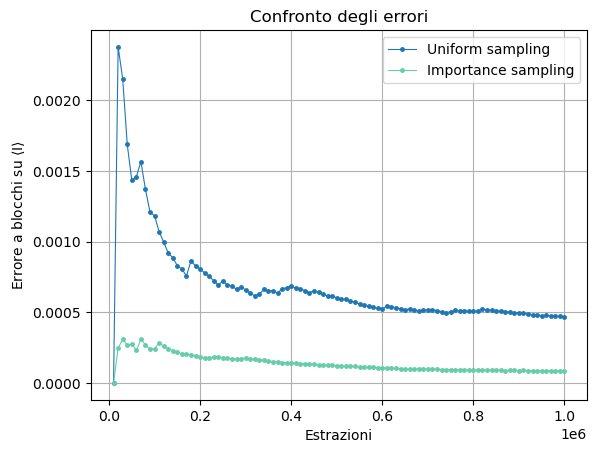

In [30]:
plt.plot(inx, userrorbars, label="Uniform sampling", marker='o', markersize=2.5, linewidth=0.8)
plt.plot(inx, iserrorbars, label="Importance sampling", marker='o', markersize=2.5, linewidth=0.8, color="mediumaquamarine")
plt.title("Confronto degli errori")
plt.xlabel("Estrazioni")
plt.ylabel(r"Errore a blocchi su $\left< \mathrm{I} \right>$")
plt.grid(True)
plt.legend()
plt.show()

## Esercizio 2.2

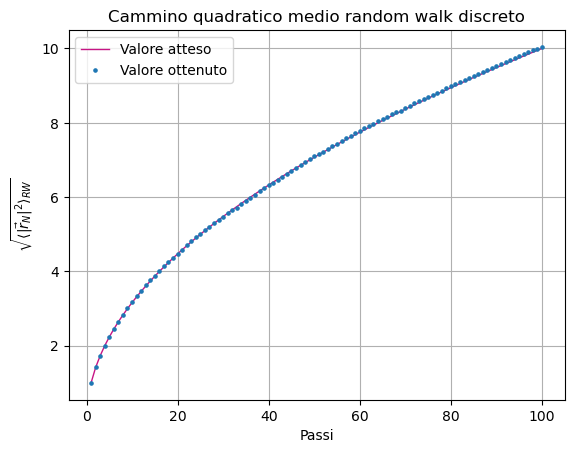

In [8]:
Sdrw=100  #numero di steps
drwx=np.arange(Sdrw)+1  #vettore con le ascisse del plot
drwy=np.loadtxt("descreterw.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore con le ordinate del plot

plt.plot(drwx, np.sqrt(drwx), linewidth=1, color="mediumvioletred", label="Valore atteso")
plt.plot(drwx, drwy, marker='o', markersize=2.3, linestyle='None', label="Valore ottenuto")
plt.xlabel("Passi")
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
plt.title("Cammino quadratico medio random walk discreto")
plt.grid(True)
plt.legend()
plt.show()
